## Predicting Newsletter Subscription from Player Characteristics on a Minecraft Research Server

## Introduction

**Background**: Players on the Minecraft research server vary in their engagement and demographic profiles. Two important factors that might influence whether a player subscribes to the game-related newsletter are the total hours they have spent playing (played_hours) and their age (Age). 
Investigating how these two variables relate to subscription can
can help the team with recruiting players.

**Question**: Can total hours played (played_hours) and player age (Age) predict whether a player subscribes (subscribe) to the game-related newsletter?


**Data description**:  The dataset used for this analysis is contained in the file players.csv, which includes detailed information about individual players on the Minecraft research server.
- **File**: players.csv
- **Number of observations**: 196 players
- **Number of variables**:7
- **Data source**: Player activity and survey data collected by the UBC Computer Science research group studying video game behavior and newsletter subscription.

| Variable       | Type        | Description                                                   |
|----------------|------------|---------------------------------------------------------------|
| `experience`   | Categorical | Player experience level (e.g., "Pro", "Veteran", "Amateur", "Beginner", "Regular") |
| `subscribe`    | Boolean     | Whether the player subscribed to the game-related newsletter (`TRUE` or `FALSE`)        |
| `hashedEmail`  | String      |  player identifier (hashed email address)             |
| `played_hours` | Numeric     | Total number of hours the player has played on the server                   |
| `name`         | String      | Player’s  name                              |
| `gender`       | Categorical | Player’s self-reported gender identity (e.g., Male, Female)          |
| `Age`          | Numeric     | Age of the player in years            |



## Methods and results

First, we load the libraries and set the height and width of the graphs

In [1]:
library(tidyverse)
library(tidymodels)
library(repr)
library(RColorBrewer)

options(repr.plot.width=12,repr.plot.height=6)

set.seed(200)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
players=read_csv("players.csv")
players


Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


We then clean the dataset to remove irrelevant rows and convert variables to the appropriate types.

In [3]:
# Drop rows with missing Age or played_hours
players_clean <- players|>
  filter(!is.na(Age), !is.na(played_hours))

# Convert subscribe to factor (response variable)
players_clean <- players_clean|>
  mutate(subscribe = as.factor(subscribe))


We focused on two predictors; age and played_hours, and the response variable; subscribe. Hence, we will summarize these variables.

In [4]:
players_clean <- players_clean|>
  select(subscribe, Age, played_hours)


To explore whether our chosen explanatory variables (Age and played_hours) are useful predictors of the response variable (subscribe), we will create histogram plots that show how each variable relates to subscription status.

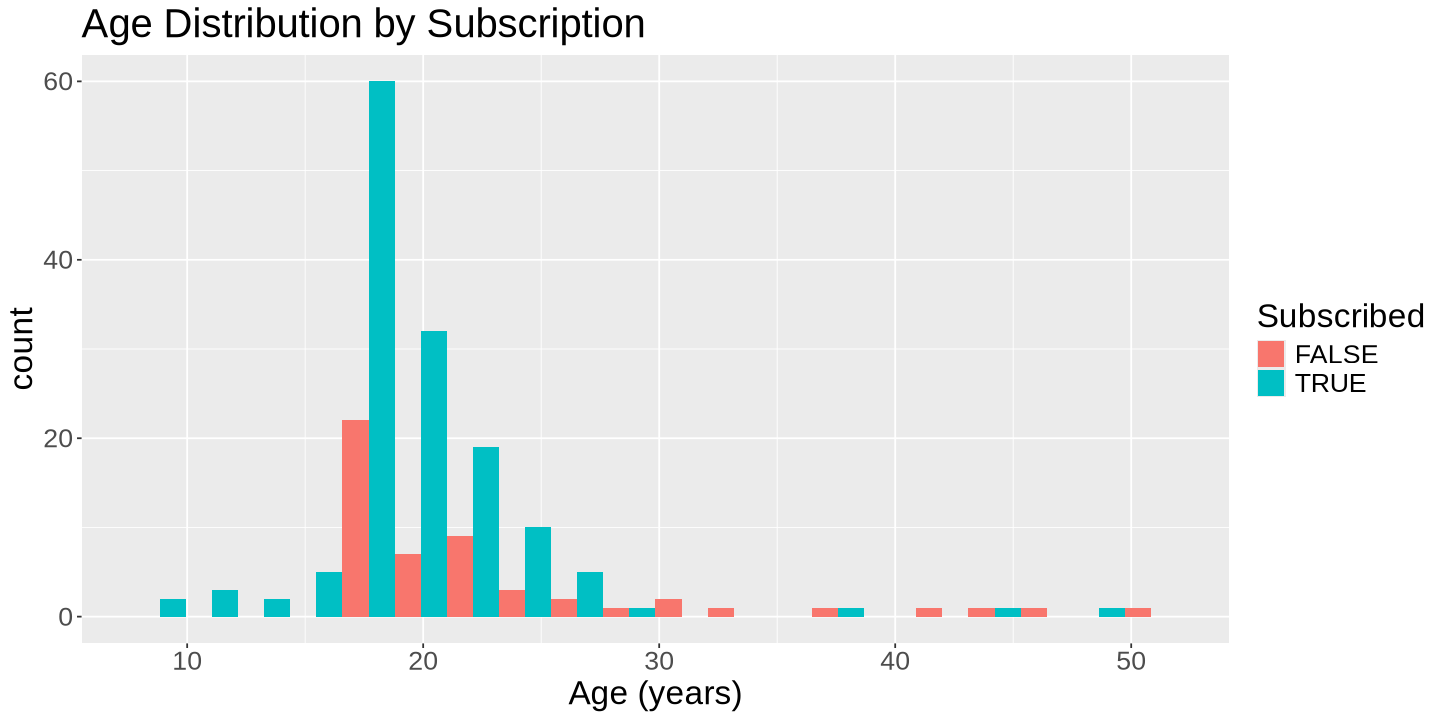

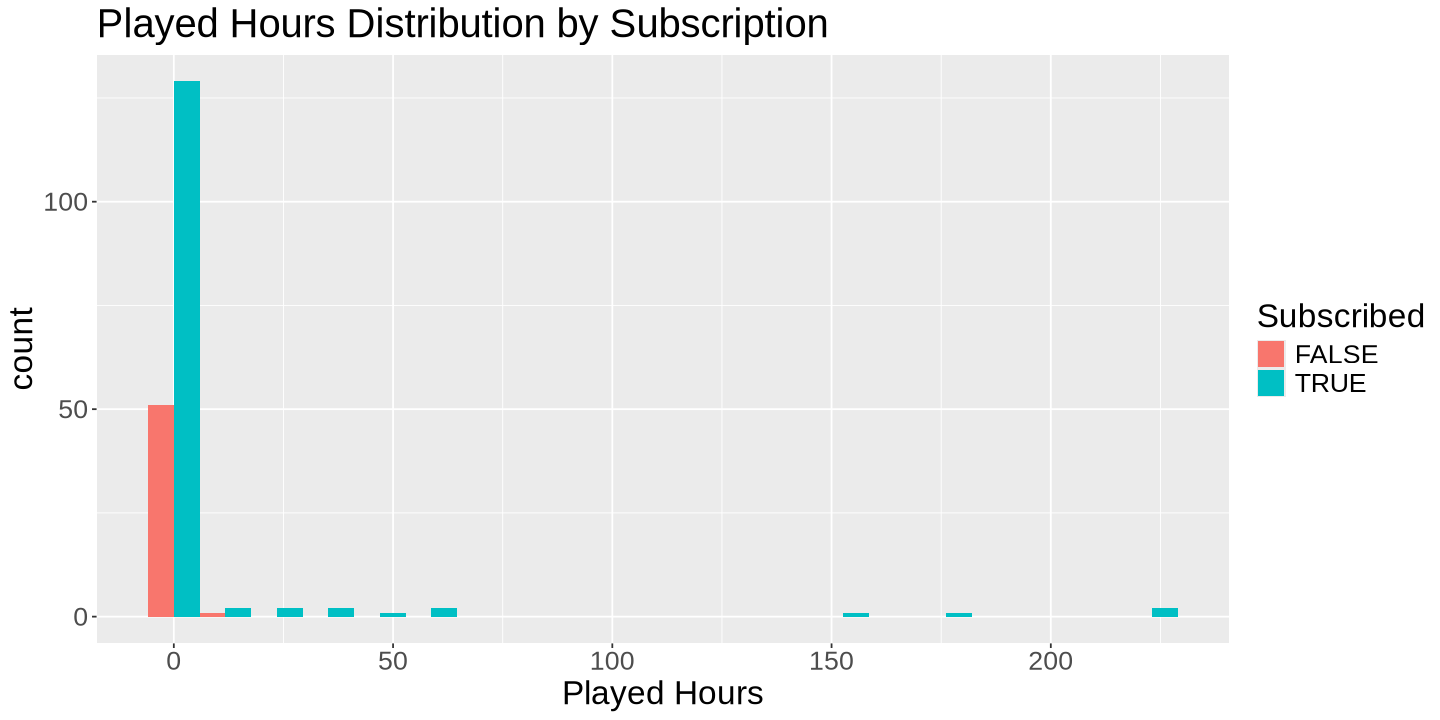

In [5]:
# Histogram of Age
players_clean|>
  ggplot(aes(x = Age, fill = subscribe)) +
  geom_histogram(bins = 20, position = "dodge") +
  labs(title = "Age Distribution by Subscription", x = "Age (years)", fill = "Subscribed")+
theme(text=element_text(size=20))
  

# Histogram of Played Hours
players_clean|>
  ggplot(aes(x = played_hours, fill = subscribe)) +
  geom_histogram(bins = 20, position = "dodge") +
  labs(title = "Played Hours Distribution by Subscription", x = "Played Hours", fill = "Subscribed")+
theme(text=element_text(size=20))
 


While neither variable shows a perfectly clear or strong visual correlation with the subscription status, both Age and Played Hours show enough variation across subscription groups to justify using them as predictors in a classification model like KNN.

### Model selection and tuning

We used KNN due to its simplicity and ability to capture local data structures. KNN assumes the response variable can be inferred from nearby data points in the feature space. We tuned the number of neighbors (k) using 5-fold cross-validation over a range from 1 to 25. 



To roughly approximate how we split our training and testing data, we first find the percentages of subscription classes in the training data, which should roughly match the split proportion.

In [17]:
player_split=initial_split(players_clean,prop=0.75,strata=subscribe)
player_train=training(player_split)
player_test=testing(player_split)

player_proportions=player_train|>
group_by(subscribe)|>
summarize(n=n())|>

mutate(percent=100*n/nrow(player_train))

player_proportions


subscribe,n,percent
<fct>,<int>,<dbl>
FALSE,39,26.89655
TRUE,106,73.10345


In [39]:
player_recipe=recipe(subscribe~Age+played_hours,data=player_train)|>
step_scale(all_predictors())|>
step_center(all_predictors())

knn_spec=nearest_neighbor(neighbors=tune(),weight_func="rectangular")|>
set_engine("kknn")|>
set_mode("classification")

player_vfold=vfold_cv(player_train,v=5,strata=subscribe)

k_vals=tibble(neighbors=seq(from=1,to=25,by=1))

knn_results=workflow()|>
add_recipe(player_recipe)|>
add_model(knn_spec)|>
tune_grid(resamples=player_vfold,grid=k_vals)|>
collect_metrics()

knn_results



neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.5241872,5,0.033033625,Preprocessor1_Model01
1,roc_auc,binary,0.5360390,5,0.017289660,Preprocessor1_Model01
2,accuracy,binary,0.5310837,5,0.031558290,Preprocessor1_Model02
2,roc_auc,binary,0.5411410,5,0.018307561,Preprocessor1_Model02
3,accuracy,binary,0.6274220,5,0.017242161,Preprocessor1_Model03
3,roc_auc,binary,0.5983573,5,0.027880751,Preprocessor1_Model03
4,accuracy,binary,0.6133990,5,0.026124821,Preprocessor1_Model04
4,roc_auc,binary,0.5832947,5,0.030877948,Preprocessor1_Model04
5,accuracy,binary,0.6133990,5,0.026124821,Preprocessor1_Model05


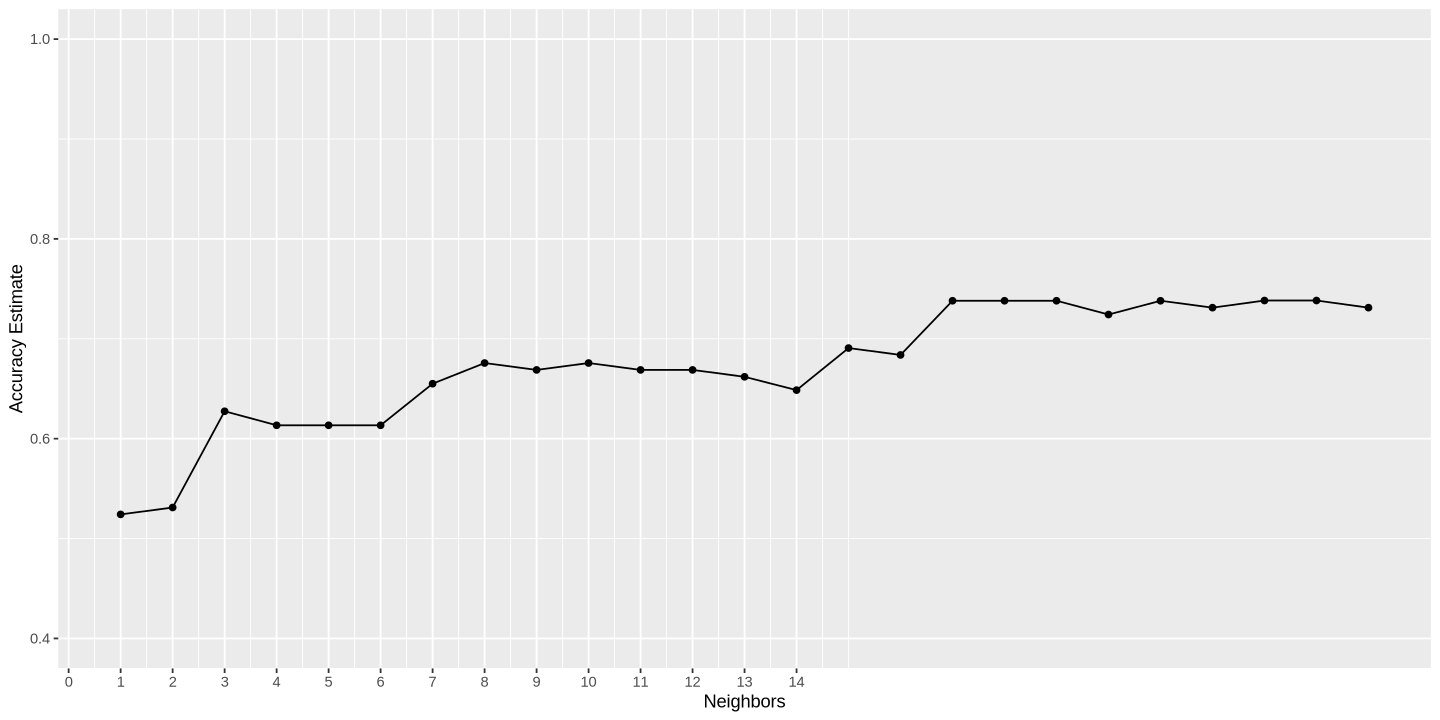

In [44]:
accuracies <- knn_results |> 
      filter(.metric=="accuracy")

accuracy_versus_k<- ggplot(accuracies, aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line() +
      labs(x = "Neighbors", y = "Accuracy Estimate") +
      scale_x_continuous(breaks = seq(0, 14, by = 1)) +  # adjusting the x-axis
      scale_y_continuous(limits = c(0.4, 1.0)) # adjusting the y-axis



accuracy_versus_k

In [45]:
max_k=knn_results|>
filter(.metric=="accuracy")|>
slice_max(mean,n=1)
max_k

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
23,accuracy,binary,0.7382923,5,0.01198848,Preprocessor1_Model23
24,accuracy,binary,0.7382923,5,0.01198848,Preprocessor1_Model24


We selected $k = 23$ as the optimal number of neighbors because it achieved the highest accuracy (73.8%) during 5-fold cross-validation. Accuracy plateaued beyond this point, and further increasing $k$ risks underfitting where the model becomes overly generalized and fails to capture  patterns in the data. 

## Final model and evaluation

We fit the final model on the training set using the tuned recipe and selected k value. We then predicted subscription on the test set and evaluated model performance: